In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt


2024-10-22 23:11:14.947695: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-22 23:11:14.948654: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-22 23:11:14.966332: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-22 23:11:14.979071: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-22 23:11:14.996895: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
max_features = 10000  # Number of words to consider as features
maxlen = 100  # Maximum length of sequences

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
embedding_dim = 128

model = models.Sequential()
model.add(layers.Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(layers.LSTM(128))
model.add(layers.Dense(1, activation='sigmoid'))


/home/mothish/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [4]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [5]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 46s 62ms/step - accuracy: 0.7249 - loss: 0.5195 - val_accuracy: 0.8416 - val_loss: 0.3540
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.8989 - loss: 0.2582 - val_accuracy: 0.8488 - val_loss: 0.3514
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.9323 - loss: 0.1757 - val_accuracy: 0.8312 - val_loss: 0.4227
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.9582 - loss: 0.1174 - val_accuracy: 0.8416 - val_loss: 0.5108
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.9749 - loss: 0.0722 - val_accuracy: 0.8360 - val_loss: 0.5502


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8257 - loss: 0.5970
Test accuracy: 0.8278399705886841


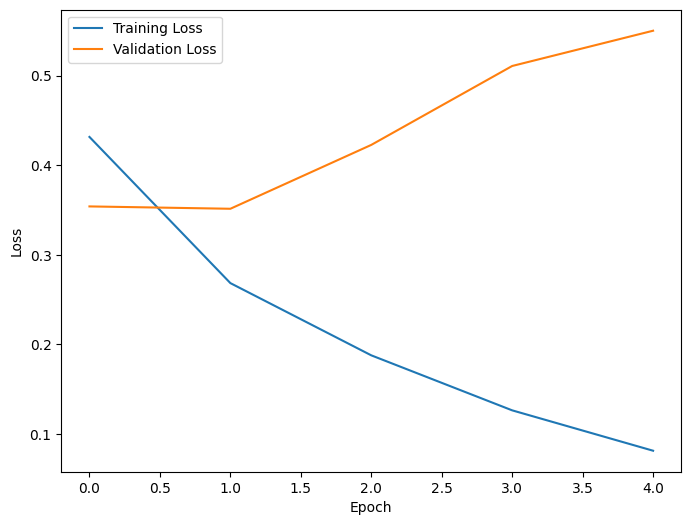

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('LSTMtensorloss.png')
plt.show()
